In [26]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [27]:
df = pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis (1).csv")
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [28]:
numeric_data = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                         Unnamed: 0    Gender       Age  Schooling  \
Unnamed: 0                 1.000000  0.179996 -0.034494  -0.148429   
Gender                     0.179996  1.000000  0.073662  -0.011534   
Age                       -0.034494  0.073662  1.000000  -0.157083   
Schooling                 -0.148429 -0.011534 -0.157083   1.000000   
Breastfeeding              0.195203 -0.083554 -0.062050  -0.083295   
Varicella                  0.264722 -0.024540  0.153851  -0.174905   
Initial_Symptom           -0.338621 -0.143060  0.107699   0.012441   
Mono_or_Polysymptomatic   -0.140338 -0.012918 -0.027001   0.037321   
Oligoclonal_Bands         -0.118743 -0.152741 -0.019016   0.001375   
LLSSEP                    -0.279448 -0.158170  0.055289  -0.023354   
ULSSEP                    -0.186867 -0.158350  0.088708  -0.067760   
VEP                       -0.288727 -0.158114  0.010566   0.005967   
BAEP                      -0.058998 -0.154031  0.208723   0.062222   
Periventricular_MRI 

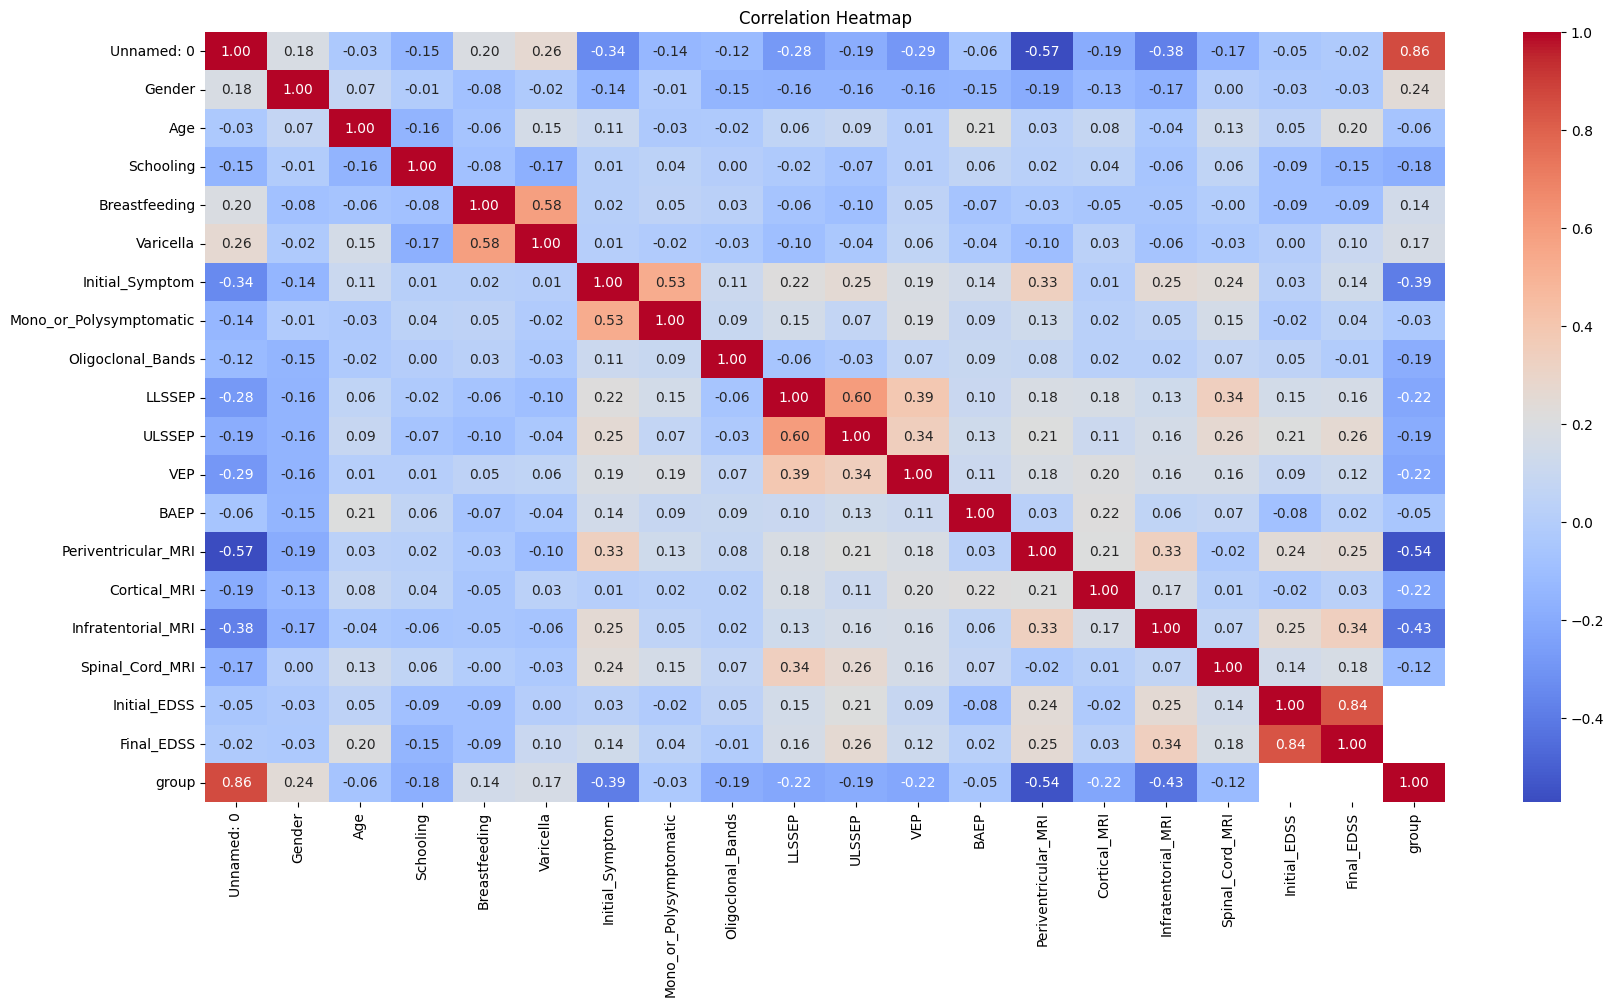

In [29]:
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
min_value = np.min(df)
max_value = np.max(df)
median_value = np.median(df)
std_dev = np.std(df)
variance = np.var(df)

print(f"Minimum: \n {min_value}")
print("----------------------------------")
print(f"Maximum: \n {max_value}")
print("----------------------------------")
print(f"Median: \n {median_value}")
print("----------------------------------")
print(f"Standard Deviation: \n {std_dev}")
print("----------------------------------")
print(f"Variance: \n {variance}")


Minimum: 
 Unnamed: 0                  0.0
Gender                      1.0
Age                        15.0
Schooling                   0.0
Breastfeeding               1.0
Varicella                   1.0
Initial_Symptom             1.0
Mono_or_Polysymptomatic     1.0
Oligoclonal_Bands           0.0
LLSSEP                      0.0
ULSSEP                      0.0
VEP                         0.0
BAEP                        0.0
Periventricular_MRI         0.0
Cortical_MRI                0.0
Infratentorial_MRI          0.0
Spinal_Cord_MRI             0.0
Initial_EDSS                1.0
Final_EDSS                  1.0
group                       1.0
dtype: float64
----------------------------------
Maximum: 
 Unnamed: 0                 272.0
Gender                       2.0
Age                         77.0
Schooling                   25.0
Breastfeeding                3.0
Varicella                    3.0
Initial_Symptom             15.0
Mono_or_Polysymptomatic      3.0
Oligoclonal_Bands       

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


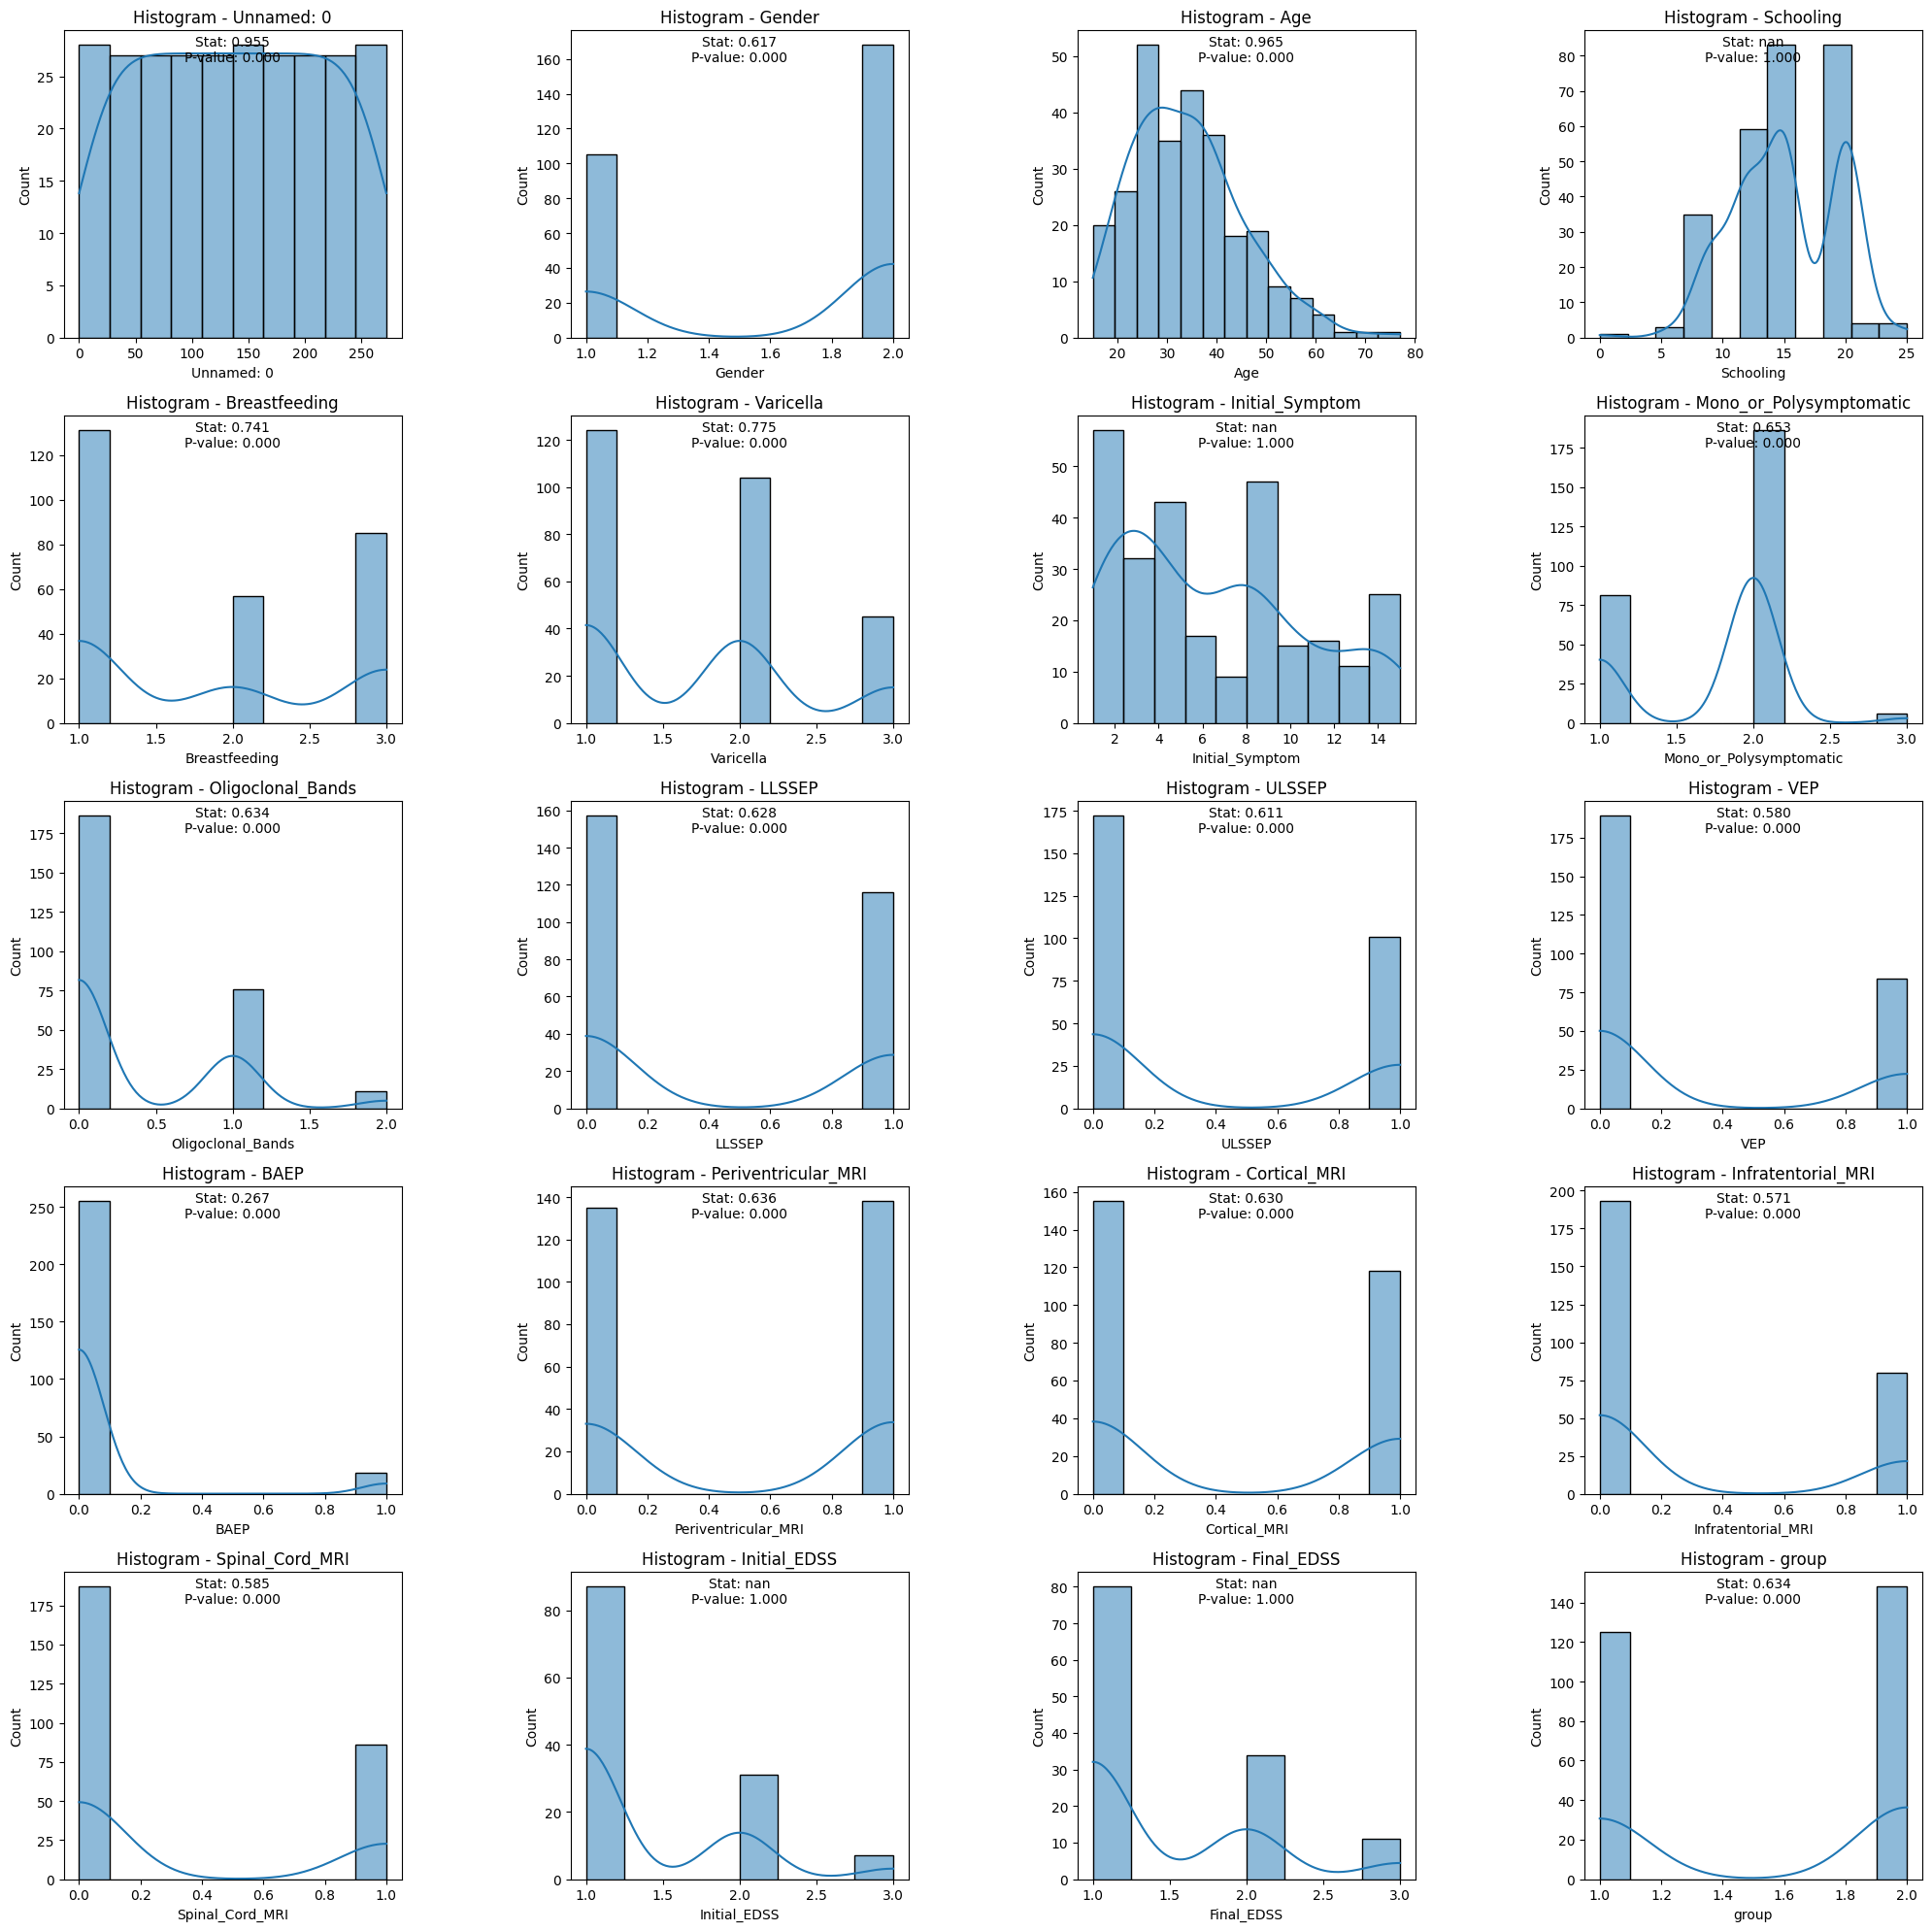

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        sns.histplot(df[df.columns[i]], kde=True, ax=ax)
        ax.set_title(f'Histogram - {df.columns[i]}')
        stat, p_value = stats.shapiro(df[df.columns[i]])
        ax.text(0.5, 0.9, f'Stat: {stat:.3f}\nP-value: {p_value:.3f}', transform=ax.transAxes, ha='center')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()


In [32]:
def min_max_normalization(df):
    min_val = df.min()
    max_val = df.max()
    normalized = (df - min_val) / (max_val - min_val)
    return normalized

def z_score_normalization(df):
    mean_val = df.mean()
    std_val = df.std()
    normalized = (df - mean_val) / std_val
    return normalized

def decimal_scaling(df):
    max_abs = np.max(np.abs(df))
    scaled = df / (10 ** np.ceil(np.log10(max_abs)))
    return scaled


In [33]:
min_max_normalization(df)

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0.000000,0.0,0.306452,0.80,0.0,0.0,0.071429,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.003676,0.0,0.741935,1.00,1.0,0.5,0.642857,0.5,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0
2,0.007353,0.0,0.112903,0.80,1.0,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.011029,1.0,0.419355,0.60,0.0,0.0,0.428571,0.5,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014706,1.0,0.306452,0.80,0.5,0.0,0.357143,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.985294,1.0,0.258065,0.32,1.0,0.0,0.571429,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
269,0.988971,0.0,0.096774,0.60,1.0,1.0,0.285714,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0
270,0.992647,1.0,0.064516,0.48,1.0,1.0,0.857143,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0
271,0.996324,1.0,0.274194,0.60,1.0,1.0,1.000000,0.5,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,1.0


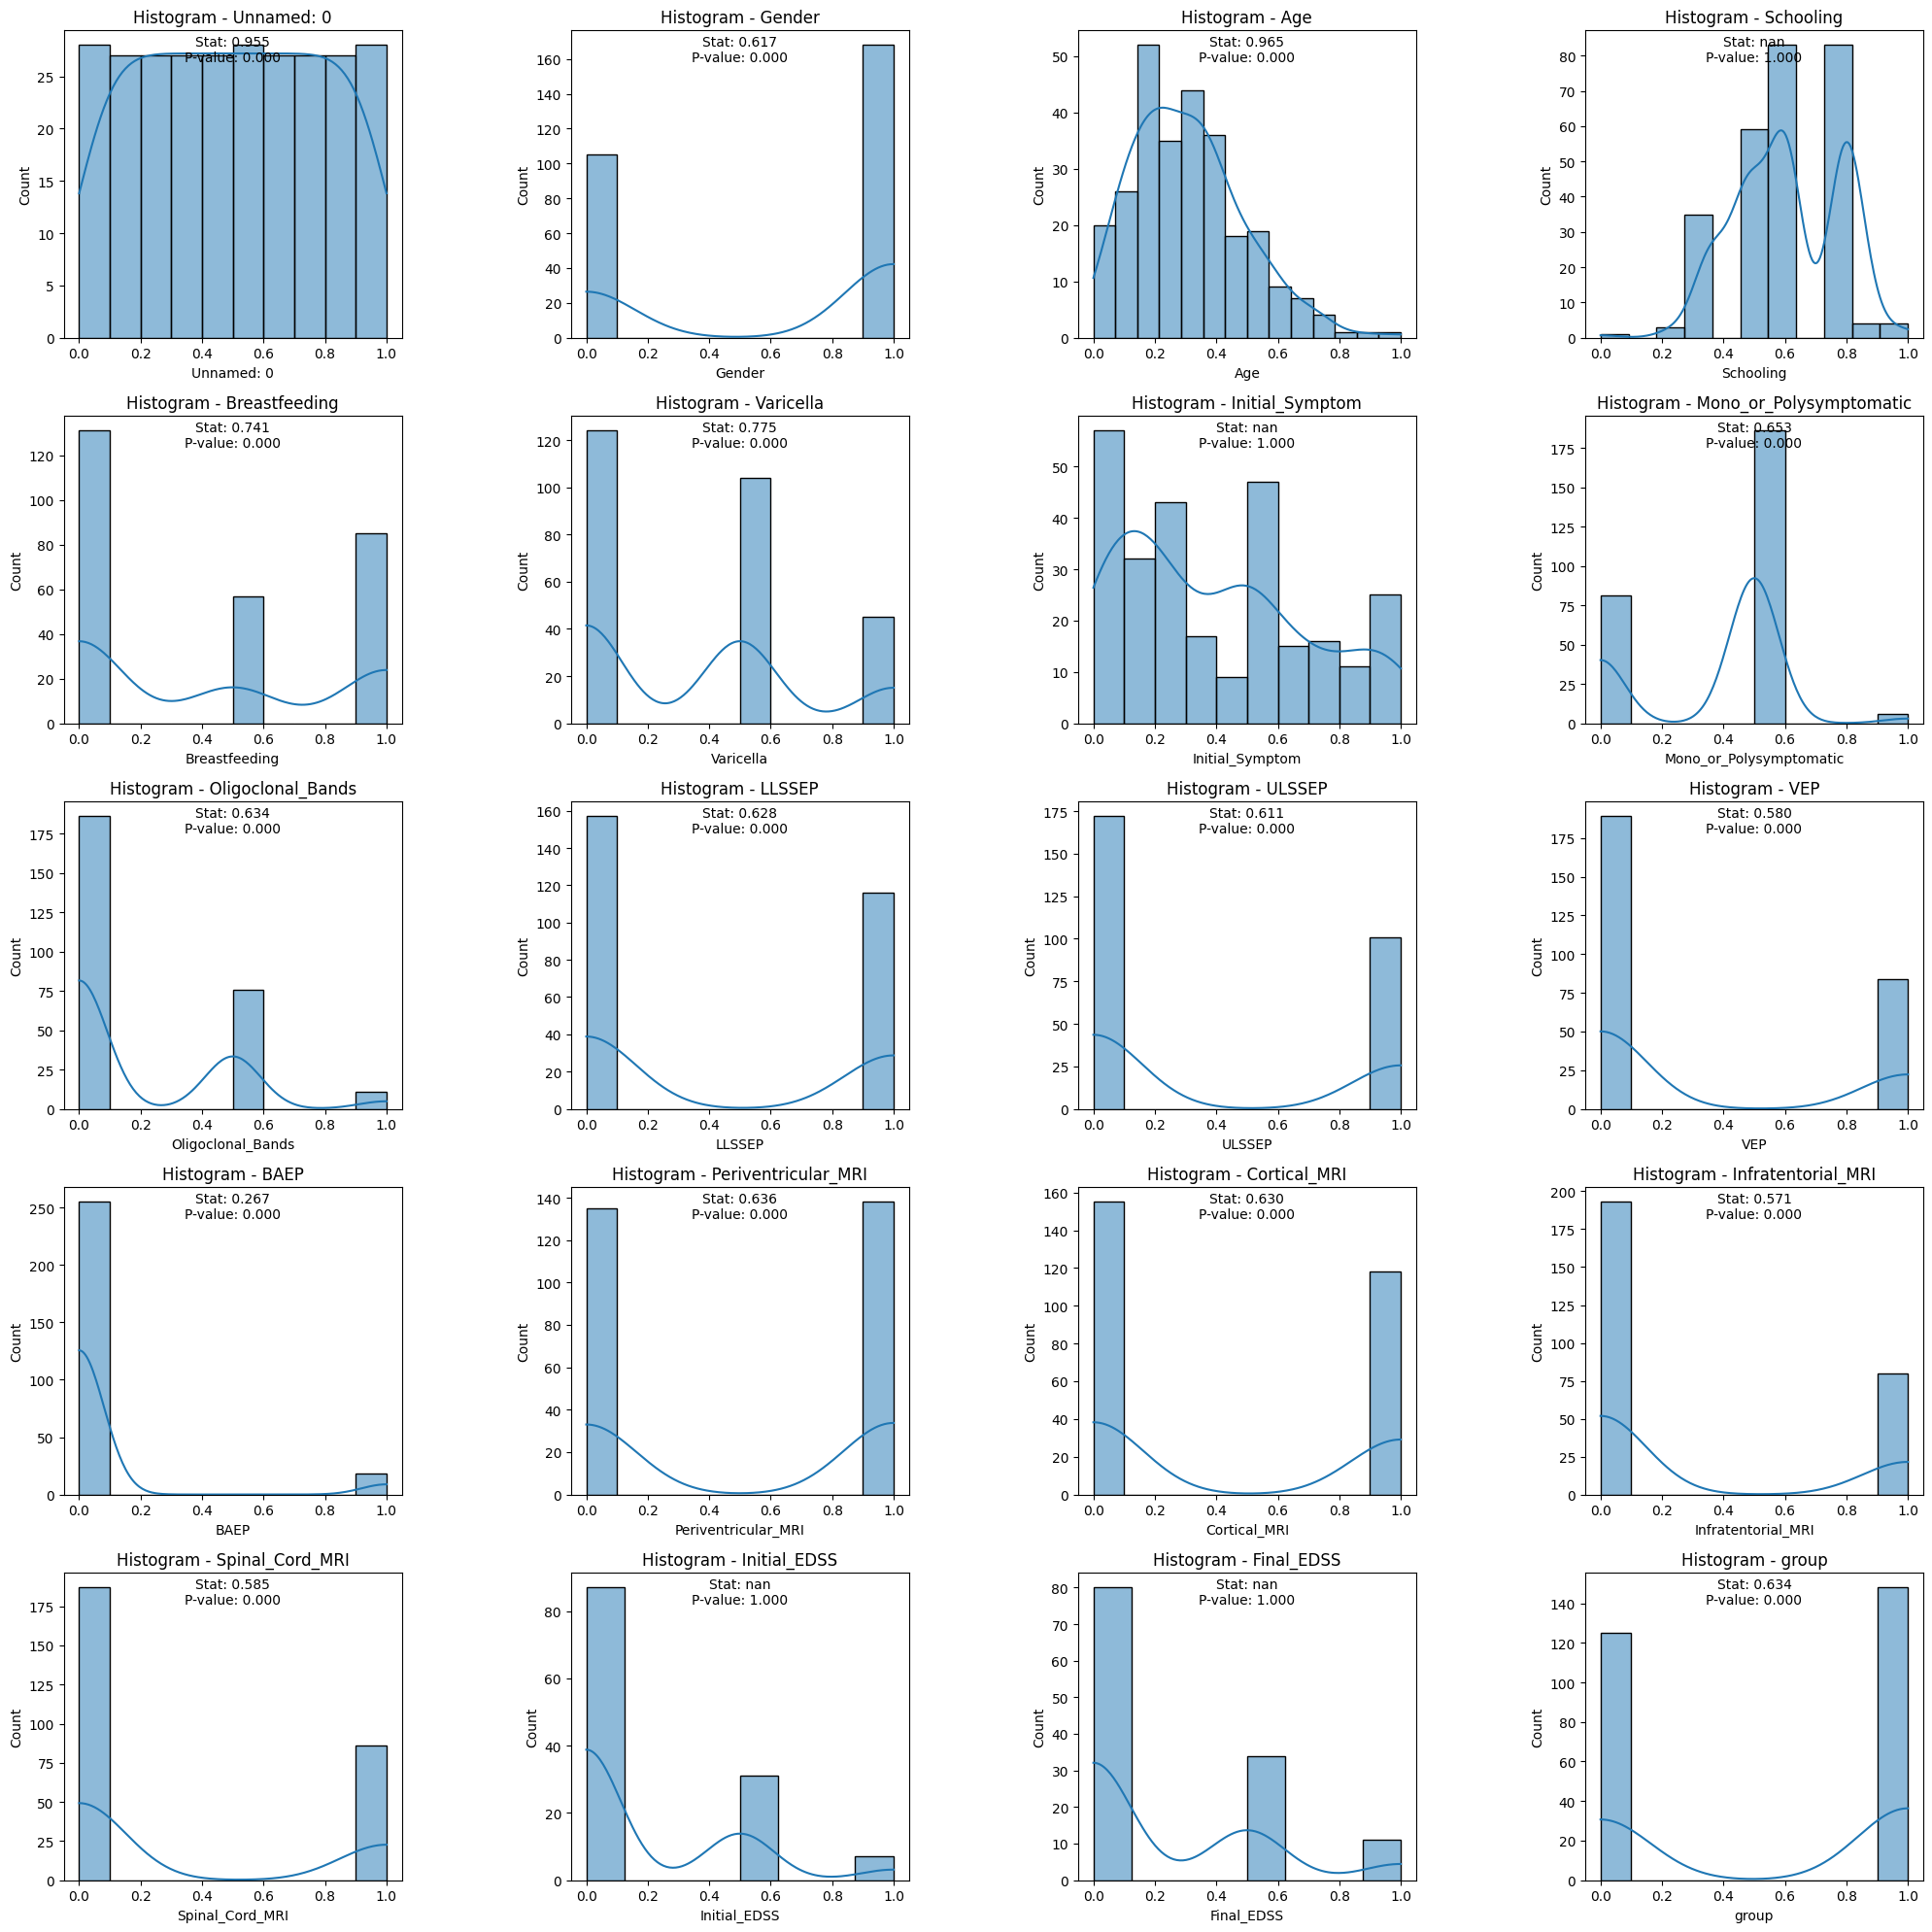

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

Min_Max = min_max_normalization(df)

for i, ax in enumerate(axes.flat):
    if i < len(Min_Max.columns):
        sns.histplot(Min_Max[Min_Max.columns[i]], kde=True, ax=ax)
        ax.set_title(f'Histogram - {Min_Max.columns[i]}')
        stat, p_value = stats.shapiro(Min_Max[Min_Max.columns[i]])
        ax.text(0.5, 0.9, f'Stat: {stat:.3f}\nP-value: {p_value:.3f}', transform=ax.transAxes, ha='center')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()


In [35]:
z_score_normalization(df)

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,-1.722554,-1.262592,-0.005603,1.136506,-0.950290,-0.969483,-1.049298,-1.467971,-0.642832,1.161245,1.302587,-0.665445,-0.265197,-1.009197,1.144005,-0.642643,1.471888,-0.612761,-0.685823,-1.086123
1,-1.709888,-1.262592,2.423685,2.314591,1.335429,0.394789,0.845534,0.556049,1.147914,1.161245,-0.764891,1.497250,-0.265197,-1.009197,-0.870920,-0.642643,1.471888,1.089354,0.845031,-1.086123
2,-1.697223,-1.262592,-1.085286,1.136506,1.335429,-0.969483,-0.812444,-1.467971,1.147914,-0.857990,-0.764891,-0.665445,-0.265197,-1.009197,1.144005,-0.642643,-0.676911,-0.612761,-0.685823,-1.086123
3,-1.684557,0.789120,0.624213,-0.041579,-0.950290,-0.969483,0.134972,0.556049,1.147914,-0.857990,1.302587,1.497250,-0.265197,0.987258,1.144005,-0.642643,-0.676911,-0.612761,-0.685823,-1.086123
4,-1.671891,0.789120,-0.005603,1.136506,0.192570,-0.969483,-0.101882,0.556049,-0.642832,1.161245,-0.764891,-0.665445,-0.265197,0.987258,-0.870920,-0.642643,-0.676911,-0.612761,-0.685823,-1.086123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1.671891,0.789120,-0.275524,-1.690899,1.335429,-0.969483,0.608680,0.556049,-0.642832,-0.857990,-0.764891,-0.665445,-0.265197,-1.009197,-0.870920,-0.642643,-0.676911,NaN,NaN,0.917334
269,1.684557,-1.262592,-1.175260,-0.041579,1.335429,1.759062,-0.338736,0.556049,1.147914,-0.857990,-0.764891,-0.665445,-0.265197,-1.009197,-0.870920,-0.642643,1.471888,NaN,NaN,0.917334
270,1.697223,0.789120,-1.355207,-0.748431,1.335429,1.759062,1.556096,0.556049,-0.642832,1.161245,1.302587,1.497250,-0.265197,-1.009197,-0.870920,-0.642643,1.471888,NaN,NaN,0.917334
271,1.709888,0.789120,-0.185550,-0.041579,1.335429,1.759062,2.029804,0.556049,1.147914,1.161245,1.302587,1.497250,-0.265197,0.987258,1.144005,1.550375,-0.676911,NaN,NaN,0.917334


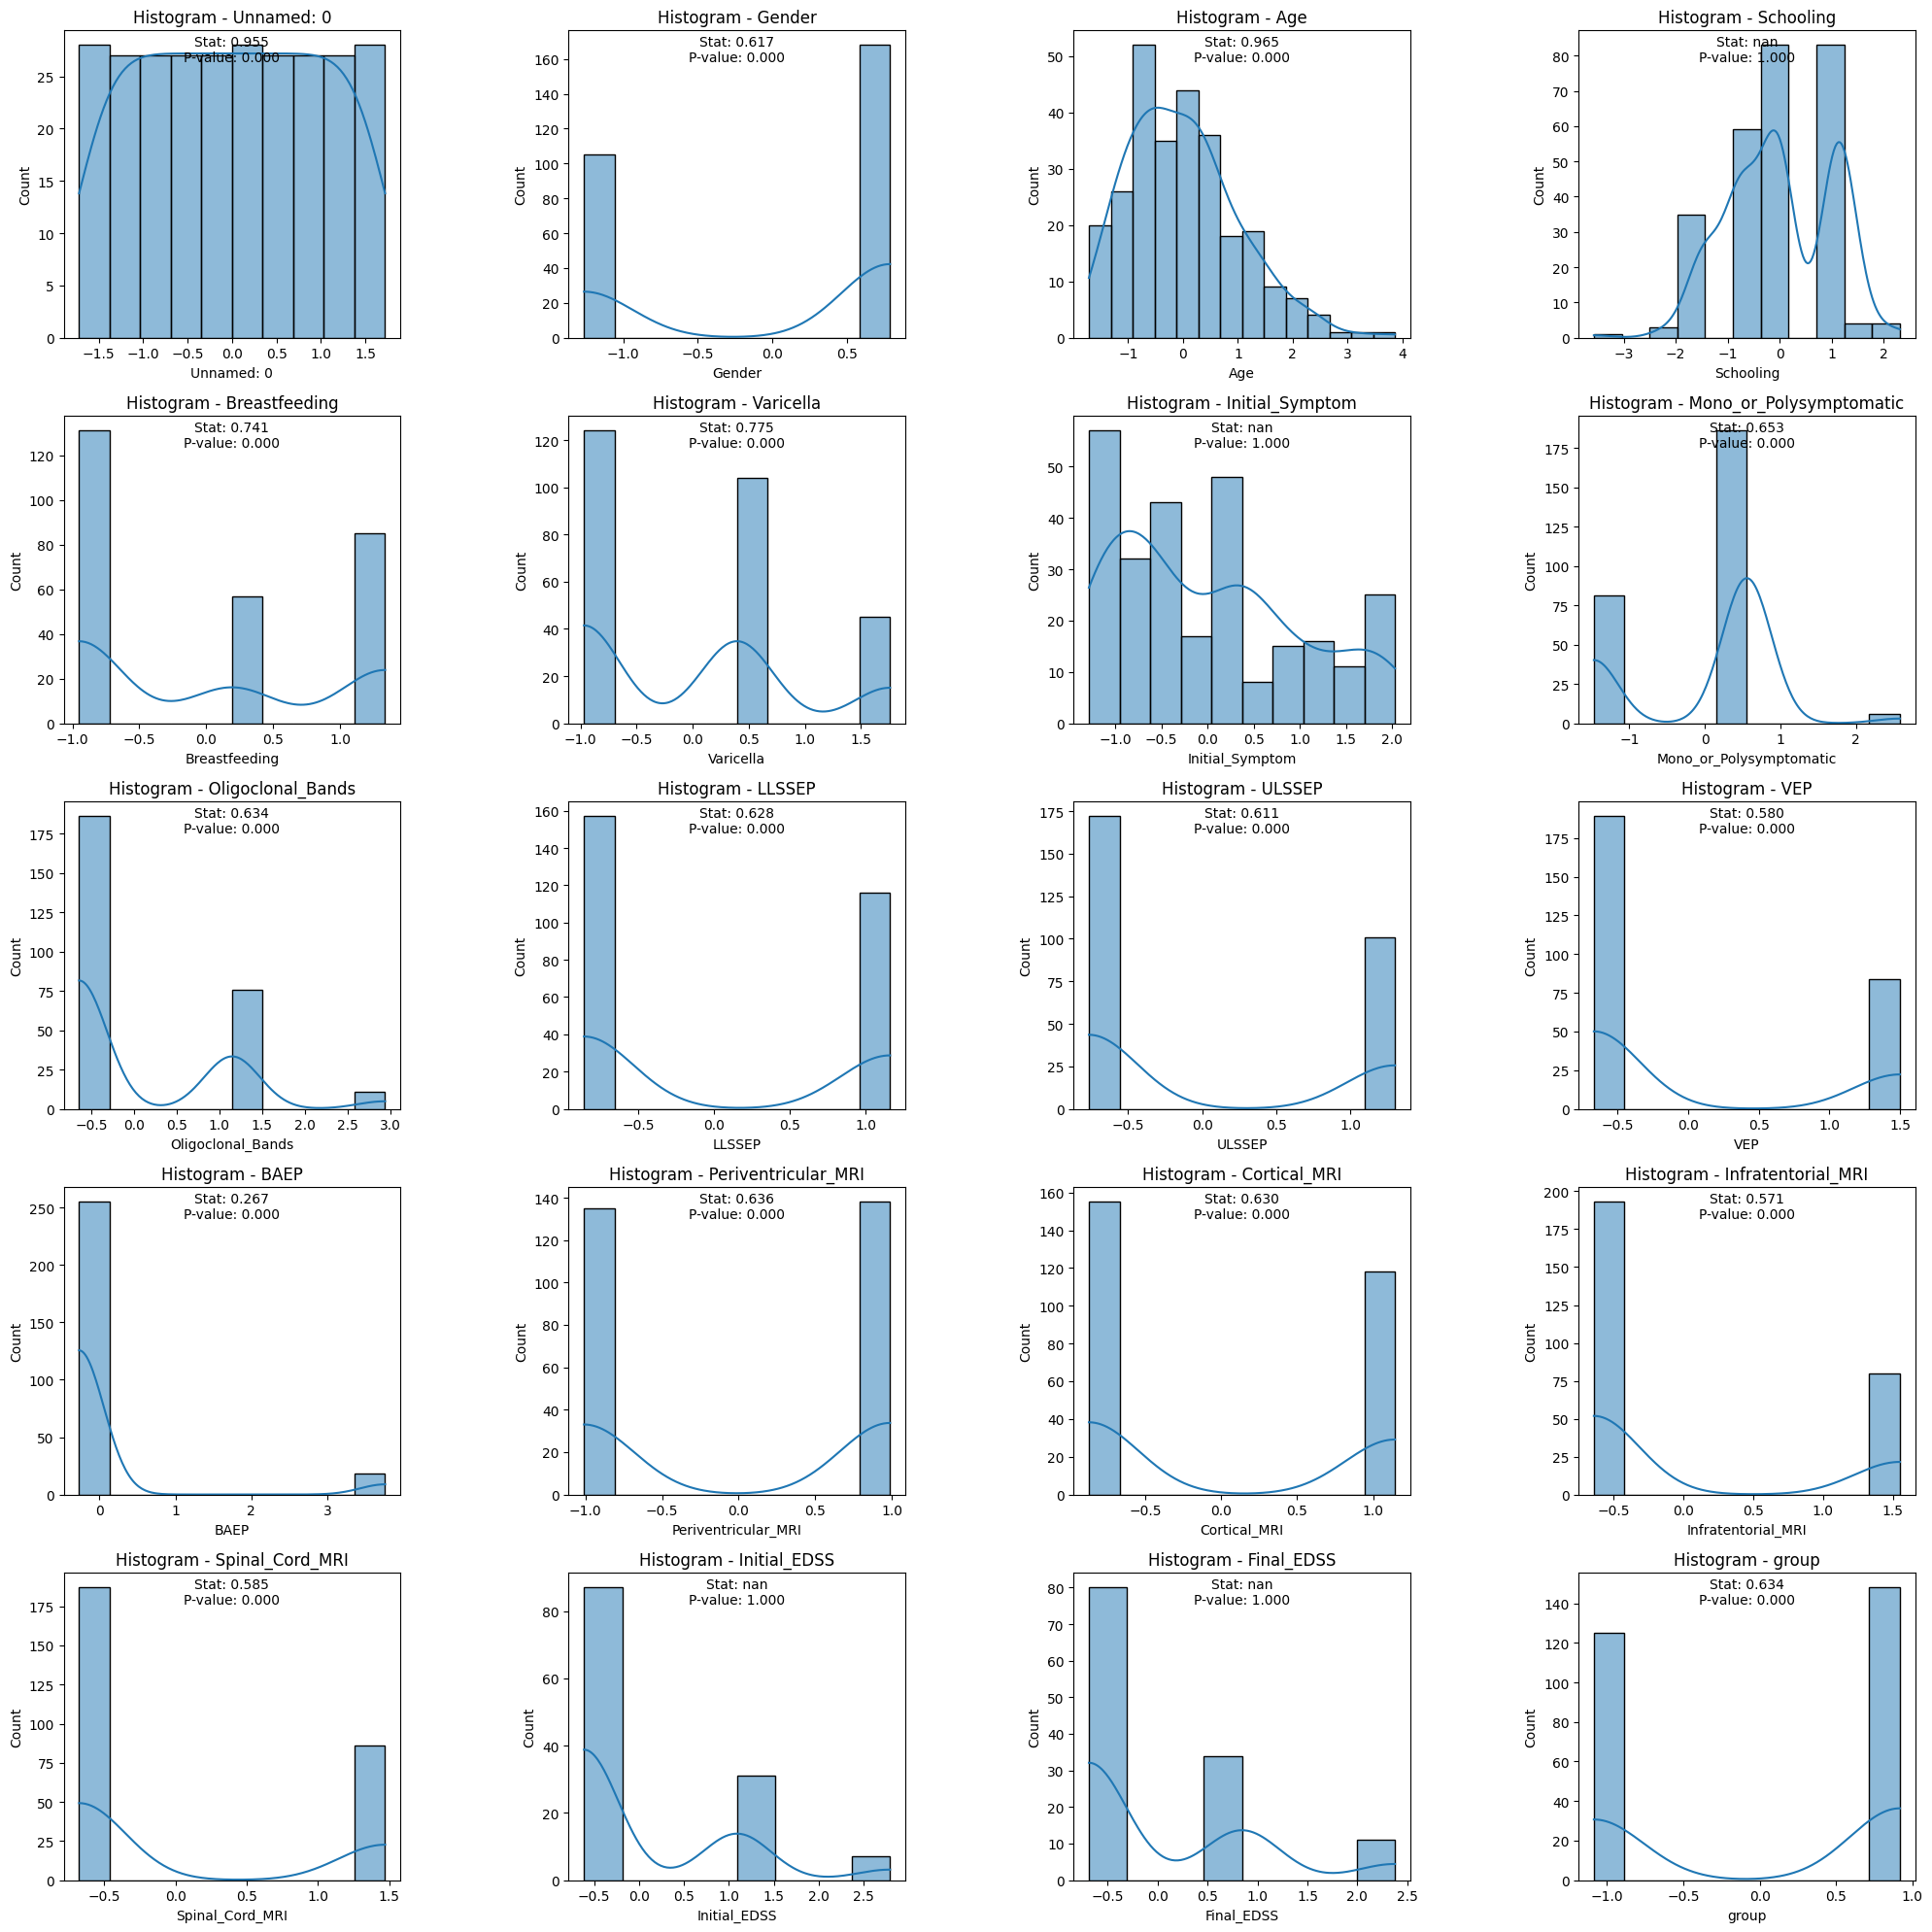

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

Z_Score = z_score_normalization(df)

for i, ax in enumerate(axes.flat):
    if i < len(Z_Score.columns):
        sns.histplot(Z_Score[Z_Score.columns[i]], kde=True, ax=ax)
        ax.set_title(f'Histogram - {Z_Score.columns[i]}')
        stat, p_value = stats.shapiro(Z_Score[Z_Score.columns[i]])
        ax.text(0.5, 0.9, f'Stat: {stat:.3f}\nP-value: {p_value:.3f}', transform=ax.transAxes, ha='center')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [37]:
decimal_scaling(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0.000,0.1,0.34,0.20,0.1,0.1,0.02,0.1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.1,0.1,0.1
1,0.001,0.1,0.61,0.25,0.3,0.2,0.10,0.2,0.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2,0.2,0.1
2,0.002,0.1,0.22,0.20,0.3,0.1,0.03,0.1,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1,0.1,0.1
3,0.003,0.2,0.41,0.15,0.1,0.1,0.07,0.2,0.1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.1,0.1,0.1
4,0.004,0.2,0.34,0.20,0.2,0.1,0.06,0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.268,0.2,0.31,0.08,0.3,0.1,0.09,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.2
269,0.269,0.1,0.21,0.15,0.3,0.3,0.05,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.2
270,0.270,0.2,0.19,0.12,0.3,0.3,0.13,0.2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.2
271,0.271,0.2,0.32,0.15,0.3,0.3,0.15,0.2,0.1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,0.2


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


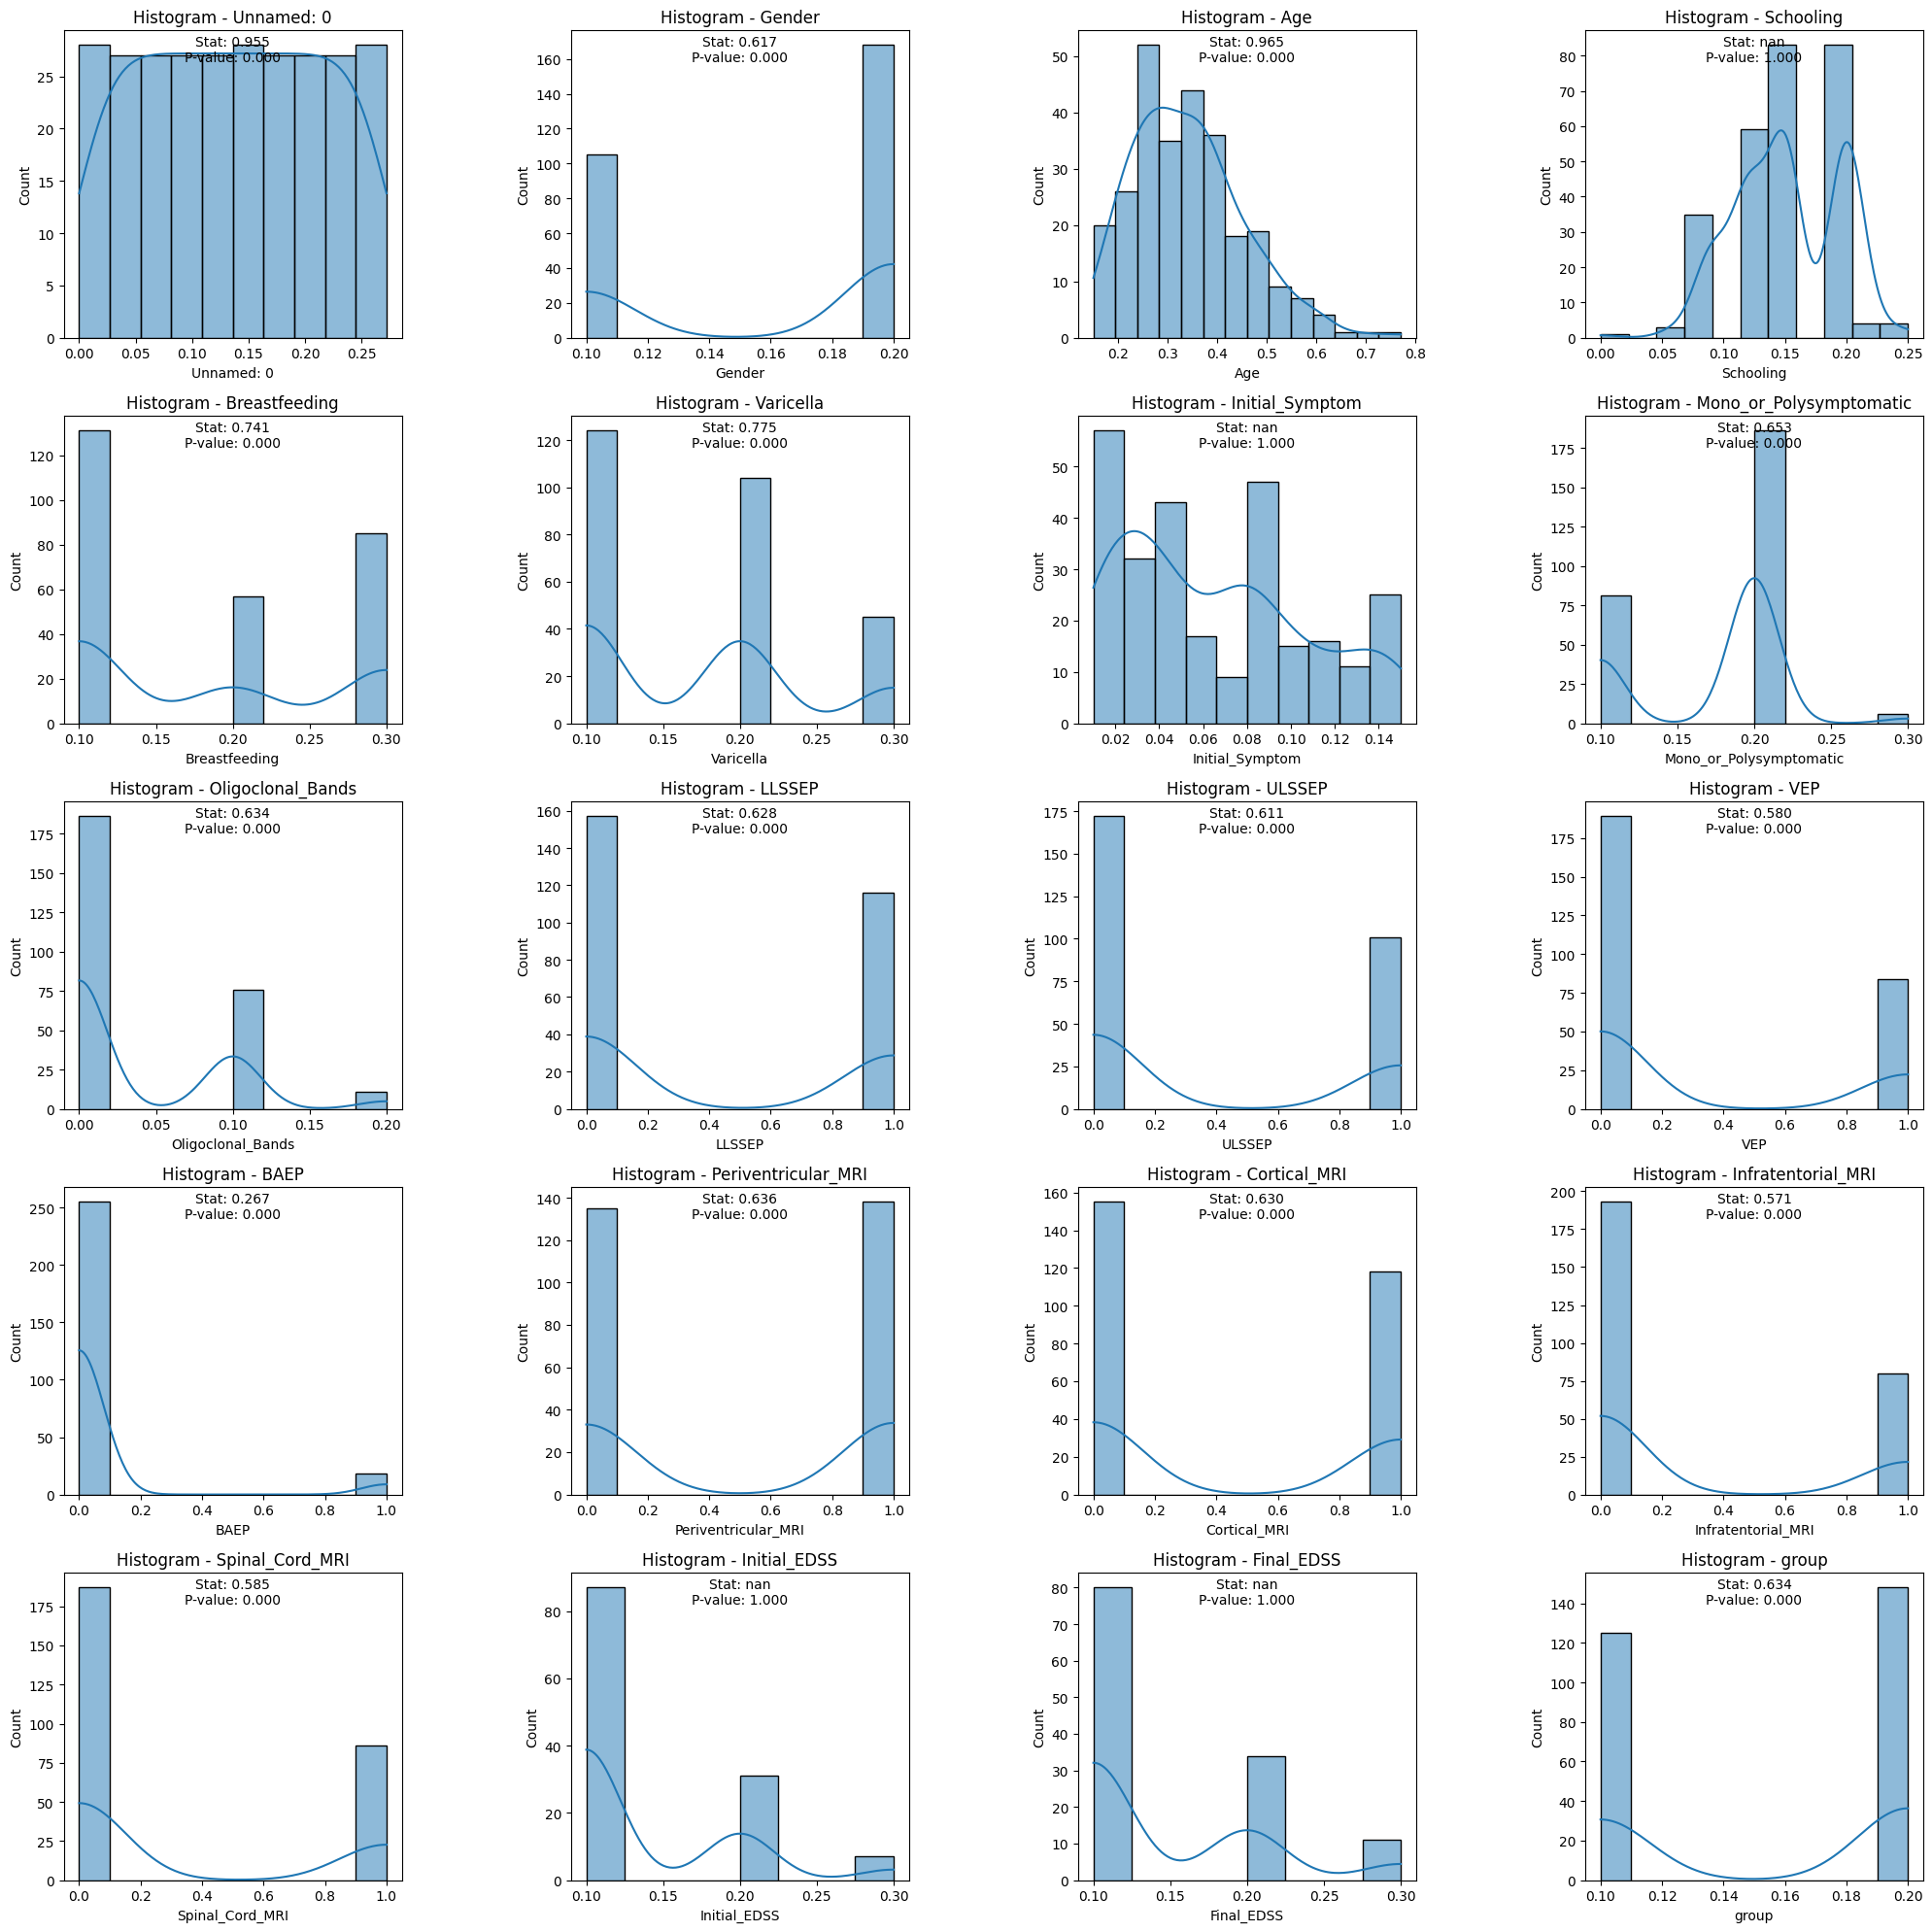

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

Decimal = decimal_scaling(df)

for i, ax in enumerate(axes.flat):
    if i < len(Decimal.columns):
        sns.histplot(Decimal[Decimal.columns[i]], kde=True, ax=ax)
        ax.set_title(f'Histogram - {Decimal.columns[i]}')
        stat, p_value = stats.shapiro(Decimal[Decimal.columns[i]])
        ax.text(0.5, 0.9, f'Stat: {stat:.3f}\nP-value: {p_value:.3f}', transform=ax.transAxes, ha='center')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [39]:
Decimal_Mean = Decimal.mean()
Decimal_Median = Decimal.median()
Decimal_Mode = Decimal.mode().iloc[0]

summary_Decimal = pd.DataFrame({
    'Mean': Decimal_Mean,
    'Median': Decimal_Median,
    'Mode': Decimal_Mode
})

Z_Score_Mean = Z_Score.mean()
Z_Score_Median = Z_Score.median()
Z_Score_Mode = Z_Score.mode().iloc[0]

summary_Z_Score = pd.DataFrame({
    'Mean': Z_Score_Mean,
    'Median': Z_Score_Median,
    'Mode': Z_Score_Mode
})

Min_Max_Mean = Min_Max.mean()
Min_Max_Median = Min_Max.median()
Min_Max_Mode = Min_Max.mode().iloc[0]

summary_Min_Max = pd.DataFrame({
    'Mean': Min_Max_Mean,
    'Median': Min_Max_Median,
    'Mode': Min_Max_Mode
})

print("                !!!!! Decimal !!!!!","\n", summary_Decimal,
      "\n\n\n\n",
      "                !!!!! Z_Score !!!!!","\n", summary_Z_Score,
      "\n\n\n\n",
      "                !!!!! Min_Max !!!!!","\n", summary_Min_Max)

                !!!!! Decimal !!!!! 
                              Mean  Median  Mode
Unnamed: 0               0.136000   0.136  0.00
Gender                   0.161538   0.200  0.20
Age                      0.340623   0.330  0.28
Schooling                0.151765   0.150  0.20
Breastfeeding            0.183150   0.200  0.10
Varicella                0.171062   0.200  0.10
Initial_Symptom          0.064301   0.060  0.08
Mono_or_Polysymptomatic  0.172527   0.200  0.20
Oligoclonal_Bands        0.035897   0.000  0.00
LLSSEP                   0.424908   0.000  0.00
ULSSEP                   0.369963   0.000  0.00
VEP                      0.307692   0.000  0.00
BAEP                     0.065934   0.000  0.00
Periventricular_MRI      0.505495   1.000  1.00
Cortical_MRI             0.432234   0.000  0.00
Infratentorial_MRI       0.293040   0.000  0.00
Spinal_Cord_MRI          0.315018   0.000  0.00
Initial_EDSS             0.136000   0.100  0.10
Final_EDSS               0.144800   0.100  0.10
gr

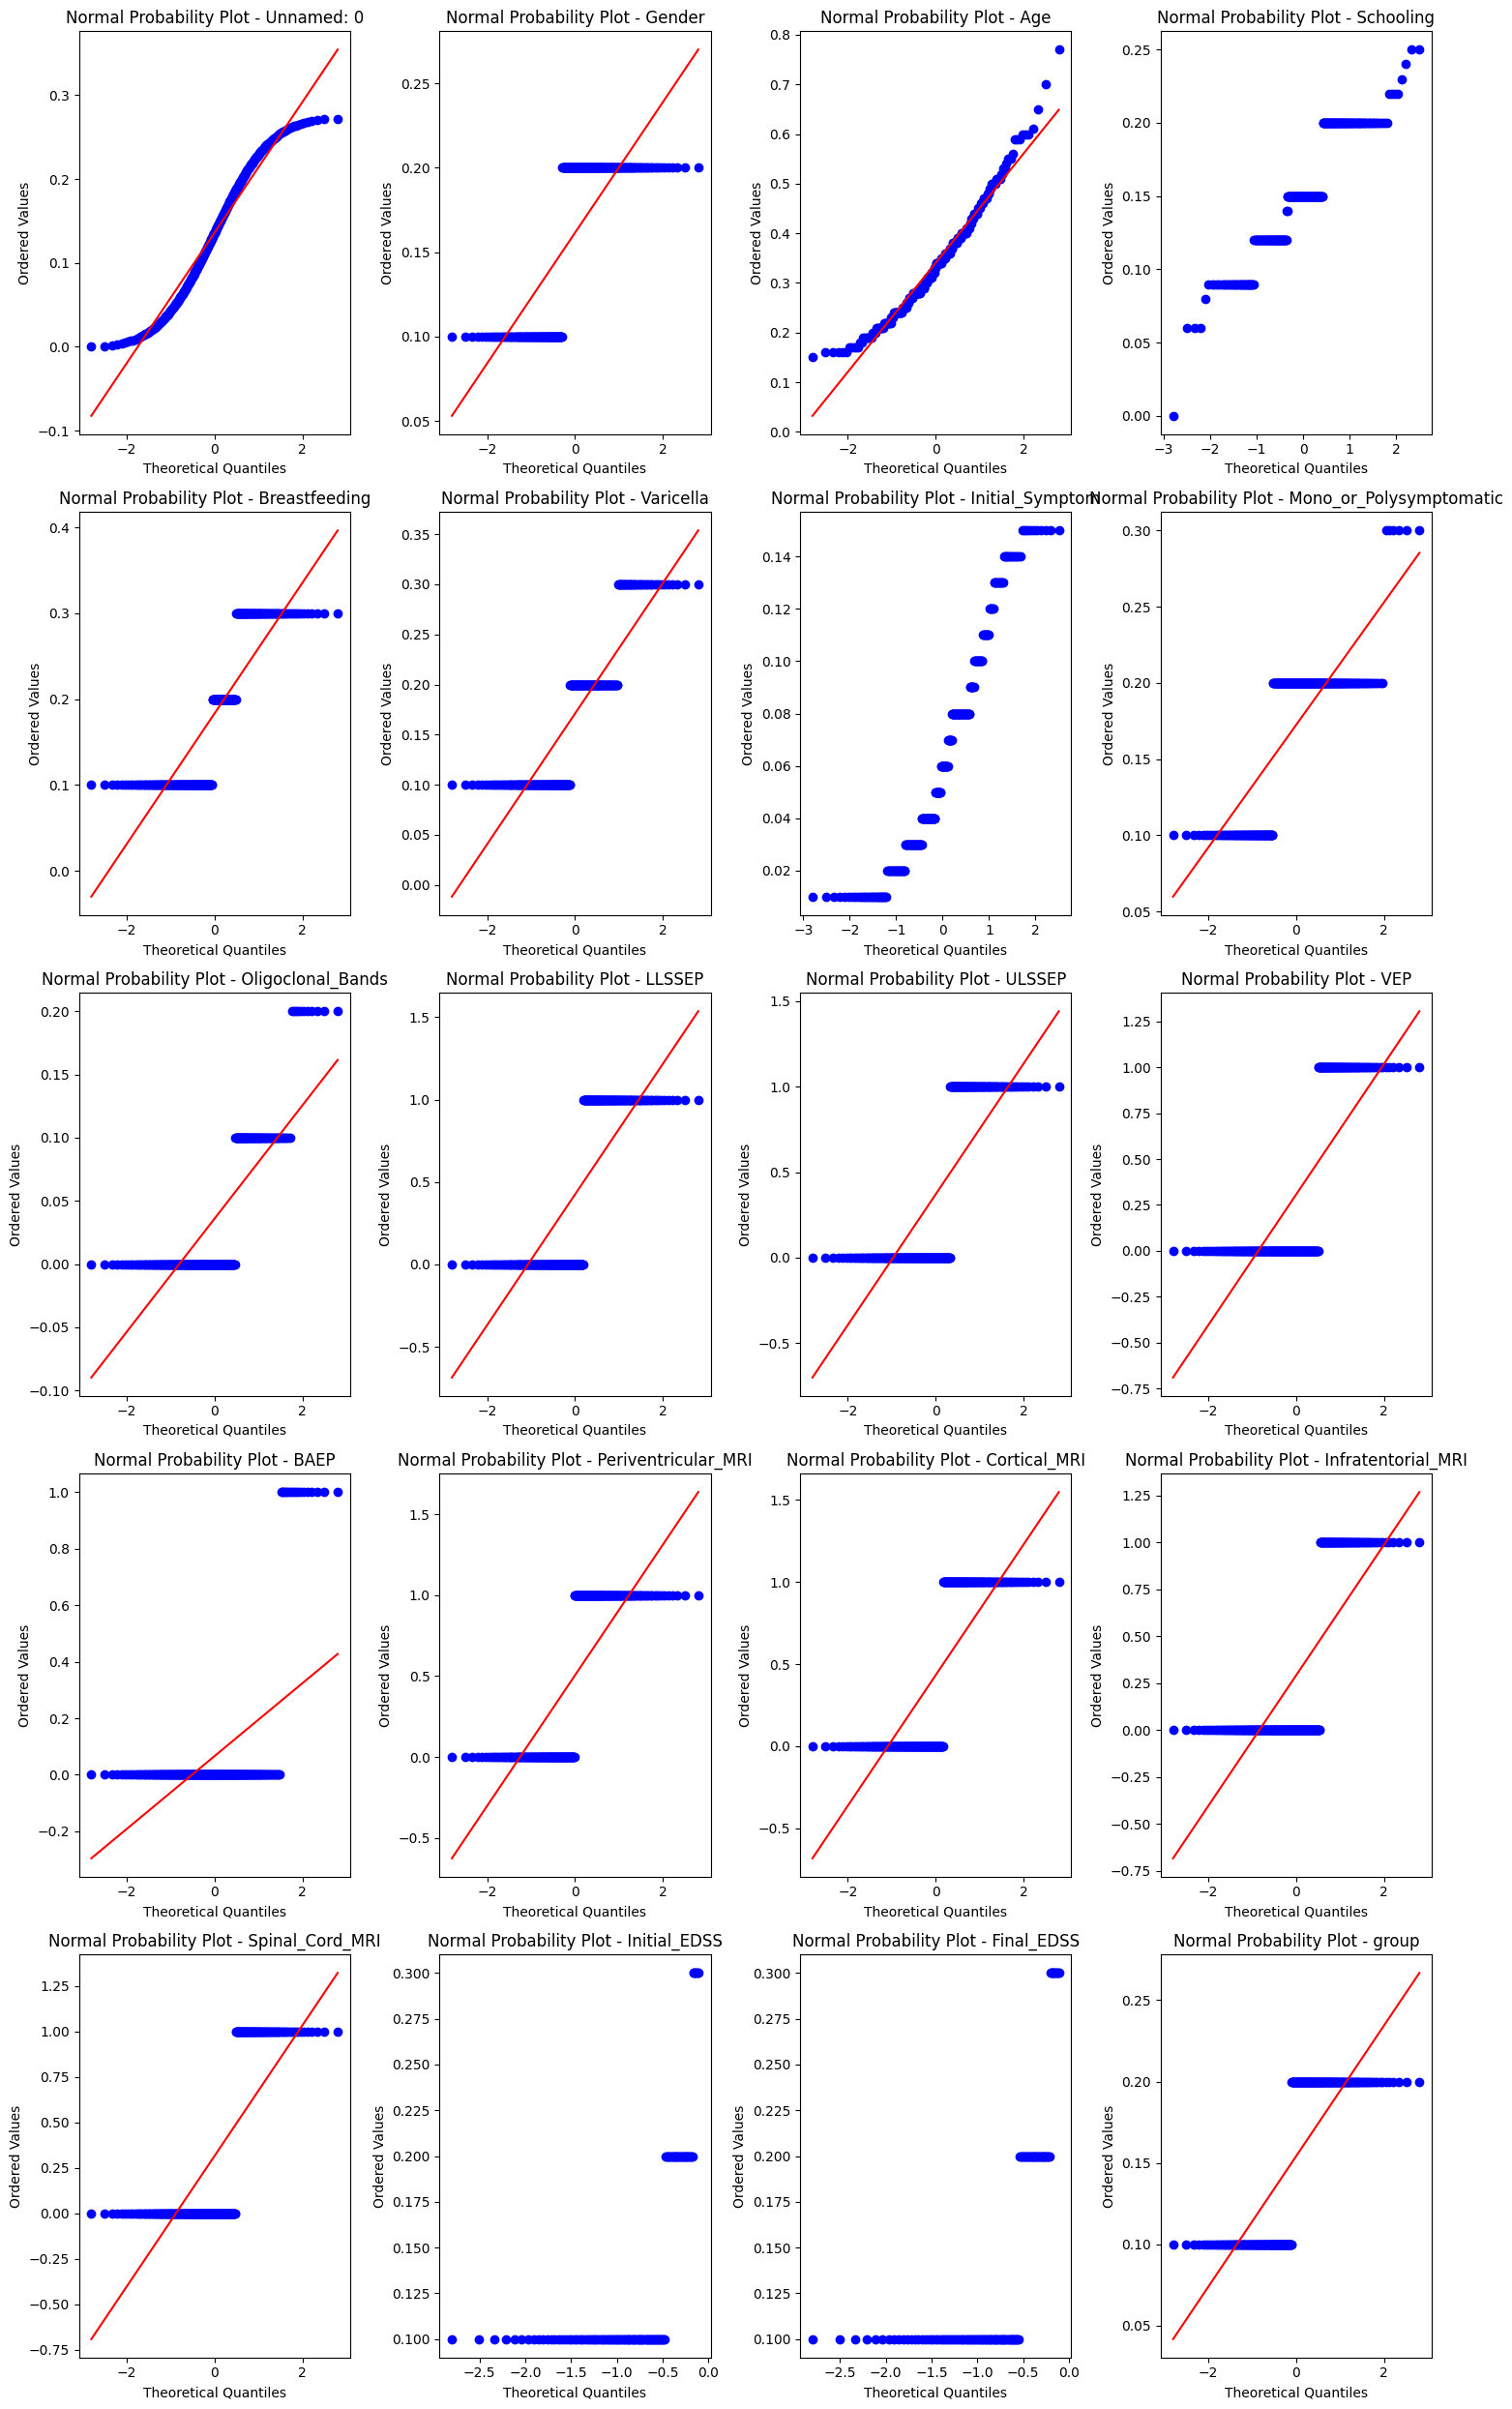

In [40]:
H = Decimal
num_rows = 5
counter = 0
num_cols = len(H.columns) // num_rows + (len(H.columns) % num_rows > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i in range(num_rows):
    for j in range(num_cols):
        if counter < len(H.columns):
            stats.probplot(H.iloc[:, counter], dist="norm", plot=axes[i, j])
            axes[i, j].set_title(f'Normal Probability Plot - {H.columns[counter]}')
            axes[i, j].set_xlabel('Theoretical Quantiles')
            axes[i, j].set_ylabel('Ordered Values')
            counter += 1
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# X = df.drop('group', axis=1)  # Features
# y = df['group']  # label
X = z_score_normalization(df).drop('group', axis=1)
y = z_score_normalization(df)['group']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=42)
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

false_positive = conf_matrix[0, 1]
true_negative = conf_matrix[0, 0]
false_positive_rate = false_positive / (false_positive + true_negative)
specificity = true_negative / (true_negative + false_positive)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')
print(f'False Positive Rate: {false_positive_rate:.2f}')
print(f'Specificity: {specificity:.2f}')
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.65
Precision: 0.79
Recall: 0.65
F1 Score: 0.60
False Positive Rate: 0.73
Specificity: 0.27
Confusion Matrix:
[[ 7 19]
 [ 0 29]]


In [62]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [63]:
conf_matrix

array([[ 7, 19],
       [ 0, 29]])

GaussianNB()